# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [3]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [5]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])


In [6]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [7]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sex_label    891 non-null    int64   
 16  embarked_C   891 non-null    bool    
 17  embarked_Q   891 non-null    bool    
 18  embarked_S   891 non-null    b

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

La diferencia radica en cómo representan los datos y qué información transmiten al modelo.

|Característica|LabelEncoder|OneHotEncoder (Get dummies)|
|--------------|------------|---------------------------|
| Formato      |Convierte cada categoría en un número (0,1,2...) |Crea una columna nueva para cada categoría (binario 0 o 1).|
|Relación de orden|Introduce un orden implícito(0<1<2)|No introduce orden; las categorías son independientes|
|Uso ideal|Variables ordinales (donde el orden importa, ej."bajo","medio","alto")|Variables nominales (no hay orden, ej. 'colores', 'países')|

### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

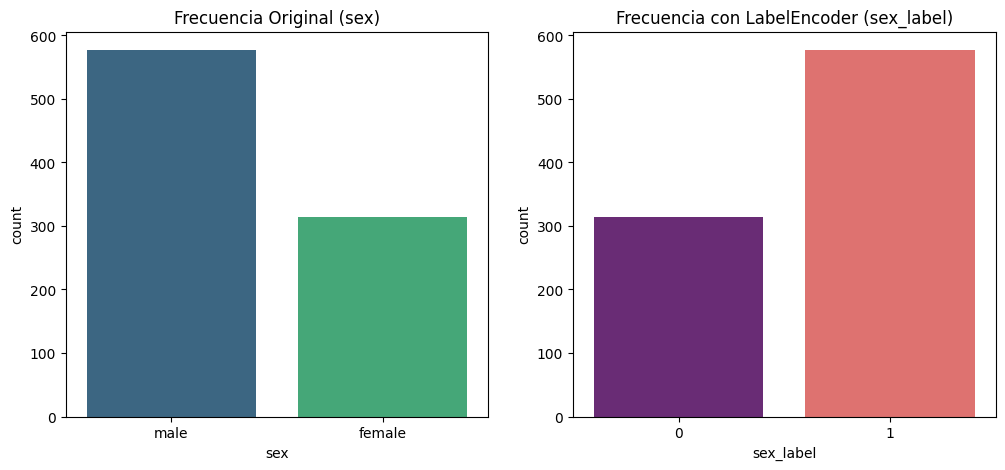

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes (Original)
sns.countplot(x='sex', data=data, ax=axes[0], hue='sex', palette='viridis', legend=False)
axes[0].set_title('Frecuencia Original (sex)')

# Después (LabelEncoder)
sns.countplot(x='sex_label', data=data, ax=axes[1], hue='sex_label', palette='magma', legend=False)
axes[1].set_title('Frecuencia con LabelEncoder (sex_label)')

plt.show()

### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [9]:
# Codificación OneHot para 'class'
class_onehot = pd.get_dummies(data['class'], prefix='class')
data = pd.concat([data, class_onehot], axis=1)

print(data[['class', 'class_First', 'class_Second', 'class_Third']].head())

   class  class_First  class_Second  class_Third
0  Third        False         False         True
1  First         True         False        False
2  Third        False         False         True
3  First         True         False        False
4  Third        False         False         True


Ventajas: En el Titanic, las clases son "First", "Second" y "Third". Si usamoa LabelEncoder (0, 1, 2), un modelo matemático podría interpretar que la "Clase 2" es el doble de la "Clase 1", o que hay una distancia numérica entre ellas. OneHotEncoder evita este sesgo al tratar cada clase como una entidad independiente, lo cual es vital para algoritmos como la Regresión Logística o Redes Neuronales.

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

La elección depende del algoritmo y del tipo de dato:

Elegiría OneHotEncoder para la mayoría de las variables nominales (como embarked o sex) si utilizo modelos lineales o basados en distancia (SVM, KNN), para evitar que el modelo asuma órdenes falsos.

Elegiría LabelEncoder solo si la variable tiene un sentido lógico de jerarquía (ej. class podría ser 1, 2, 3) o si estoy usando Árboles de Decisión o Random Forest, ya que estos modelos manejan bien los números secuenciales sin sesgarse por la magnitud.

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,sex_label,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,1,False,False,True,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,0,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,0,False,False,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,0,False,False,True,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,1,False,False,True,False,False,True
